# **GIS × Python Tutorial Session4.1 ~ shapely ことはじめ geometry の種類 ~**
---
この記事は「GIS × Python Tutorial」の関連記事です。


<br>

## **はじめに**
---
この記事では python での shapely の使用方法についてを解説していきます。


<br>

## **shapely とは**
---
shapely は幾何学的オブジェクトを操作する python のパッケージです。shapely では面積や距離を計算したり、オブジェクト同士の空間的な関係を簡単に計算する事が出来ます。また、matplotlib を使用して各 Geometry オブジェクトを描画する為のメソッドも用意されています。

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import shapely
from shapely.plotting import (
    plot_points, 
    plot_line, 
    plot_polygon
)
plt.style.use('seaborn-v0_8-whitegrid')

print(f"shapely version: {shapely.__version__}")

shapely version: 2.0.3


## **Point Object**
---

### **Point**
`shapely.Point` のオブジェクトはもっとも単純で、X座標とY座標、Z座標の3つの要素で構成され点を表すオブジェクトを作成します。

In [2]:
x = 0
y = 0

# Zは渡さずとも問題ありません
point = shapely.Point(x, y)

## **MultiPoint**
---
複数の Point を1つのオブジェクトで管理するには `shapely.MultiPoint` を使用します。


In [3]:
np.random.seed(111)
xs = x + np.random.normal(0, 0.1, 10)
ys = y + np.random.normal(0, 0.1, 10)

multi_points = shapely.MultiPoint([
    (_x, _y)
    for _x, _y in zip(xs, ys)
])

### **Plot points**
Point オブジェクトを可視化するには`shapely.plotting.plot_points`を使用します。このメソッドは `matplotlib.axes._axes.Axes`を渡す事で matplotlib の他のメソッドも使用する事が出来ます。

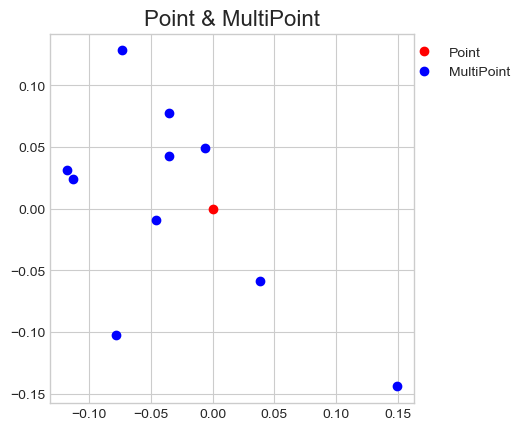

In [4]:
fig, ax = plt.subplots()
ax.set_title('Point & MultiPoint', fontsize=16)
plot_points(point, color='red', label='Point')
plot_points(multi_points, color='blue', label='MultiPoint')
ax.legend(bbox_to_anchor=(1.3, 1));

## **Line Object**
---

### **LineString**
線を表現する場合は`shapely.LineString`を使用します。LineString に渡す座標データの構造は MultiPoint と同じ構造になります。

In [5]:
line_strg = shapely.LineString([
    (0.0, 0.1),
    (0.1, 0.1),
    (0.1, 0.0),
    (0.0, 0.0)
])

### **MultiLineString**
複数のLineStringを一つのオブジェクトとして保持する場合は`shapely.MultiLineString`を使用します。

In [6]:
multi_line_strg = shapely.MultiLineString([
    [
        (0.1, 0.2),
        (0.2, 0.2),
        (0.2, 0.1),
        (0.1, 0.1)
    ],
    [
        (0.2, 0.3),
        (0.3, 0.3),
        (0.3, 0.2),
        (0.2, 0.2)
    ],
])

LineString を複数渡して MultiLineString を作成する事も可能です。

In [7]:
multi_line_strg_ = shapely.MultiLineString([line_strg, line_strg, line_strg])

### **Plot Lines**
LineString オブジェクトを可視化するには`shapely.plotting.plot_line`を使用します。

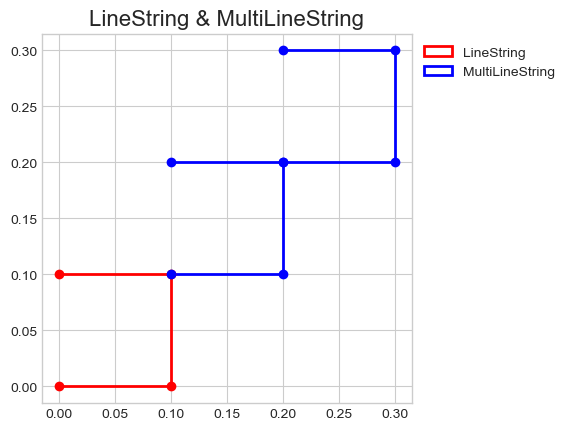

In [8]:
fig, ax = plt.subplots()
ax.set_title('LineString & MultiLineString', fontsize=16)
plot_line(line_strg, color='red', label='LineString')
plot_line(multi_line_strg, color='blue', label='MultiLineString')

ax.legend(bbox_to_anchor=(1, 1));

## **Polygon Object**
---

### **Polygon**
区画を表現する場合は`shapely.Polygon`を使用します。Polygon は閉合した線（区画）を表現します Point や LineString よりも複雑で Polygon は **shell** と **holes** という引数をとります。

shell は MultiPoint や LineString の様な1つの値を受け取り、外側の線を表現します。

holes は複数の値を受け取り、ドーナツのように区画の穴を表現します。


区画は閉合した形を作成しますが、渡すデータの最初と最後の座標を合わせる必要はありません。

In [9]:
poly = shapely.Polygon(
    [
        (0.0, 0.1),
        (0.1, 0.1),
        (0.1, 0.0),
        (0.0, 0.0)
    ],
)

doughnut = shapely.Polygon(
    shell=[
        # 外側の区画
        (0.0, 0.1),
        (0.1, 0.1),
        (0.1, 0.0),
        (0.0, 0.0)
    ],
    holes=[
        [# 1つめの穴
            (0.05, 0.08),
            (0.08, 0.08),
            (0.08, 0.05),
            (0.05, 0.05),
        ],
        [# 2つめの穴
            (0.02, 0.03),
            (0.03, 0.03),
            (0.03, 0.02),
            (0.02, 0.02),
        ]
    ]
)

### **MultiPolygon**
複数のPolygonを一つのオブジェクトとして保持する場合は`shapely.MultiPolygon`を使用します。インデントでわかりやすく表現したつもりですが、今まで見た中では一番複雑ですね。

In [10]:
multi_poly = shapely.MultiPolygon([
    [# 1つめのPolygon
        [# shell 1
            (0.0, -0.1),
            (-0.1, -0.1),
            (-0.1, -0.0),
            (0.0, 0.0)
        ]
    ],
    [# 2つめのPolygon
        [# shell 2
            (0.0, 0.1),
            (0.1, 0.1),
            (0.1, 0.0),
            (0.0, 0.0)
        ],
        [# holes 2
            [# holes 2-1
                (0.05, 0.08),
                (0.08, 0.08),
                (0.08, 0.05),
                (0.05, 0.05),
            ],
            [# holes 2-2
                (0.02, 0.03),
                (0.03, 0.03),
                (0.03, 0.02),
                (0.02, 0.02),
            ]
        ]
    ]
])

### **Plot Polygons**
Polygon オブジェクトを可視化するには`shapely.plotting.plot_polygon`を使用します。ただ残念ながら Polygon の holes は表現してくれません。

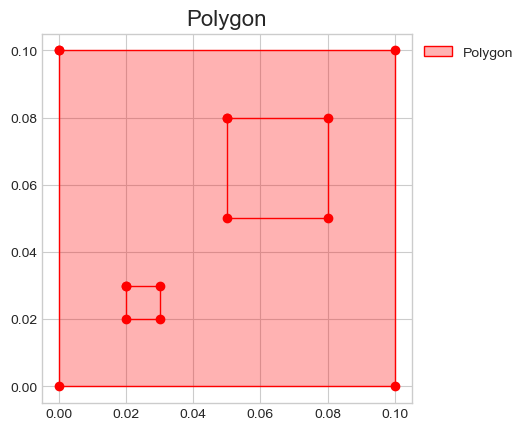

In [12]:
fig, ax = plt.subplots()
ax.set_title('Polygon', fontsize=16)
plot_polygon(doughnut, color='red', label='Polygon')

ax.legend(bbox_to_anchor=(1, 1));

ほかにも `shapely.LineRing` や `shapely.GeometryCollection` がありますがあまり使用頻度は高くないと思います。